In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\Job_requirement\HR_comma_sep.csv.crdownload")

In [4]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Clean Df

In [6]:
def reading_cleaning(df):
    df.drop_duplicates(inplace=True)
    cols=df.columns.tolist()
    df.columns=[x.lower() for x in cols]

    return df
df=reading_cleaning(df)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Everation Employee Detail

In [7]:
def employee_important_info(df):
    # Average satisfaction level
    average_satisfaction = df['satisfaction_level'].mean()

    # Department-wise average satisfaction level
    department_satisfaction = df.groupby('department')['satisfaction_level'].mean()

    # Salary-wise average satisfaction level
    salary_satisfaction = df.groupby('salary')['satisfaction_level'].mean()

    # Employees who left
    left_employees = len(df[df['left'] == 1])

    # Employees who stayed
    stayed_employees = len(df[df['left'] == 0])
    
    return average_satisfaction, department_satisfaction, salary_satisfaction, left_employees, stayed_employees


In [8]:
# Example call
average_satisfaction, department_satisfaction, salary_satisfaction, left_employees, stayed_employees = employee_important_info(df)

# Now you can print them
print("Average satisfaction level:", average_satisfaction)
print("Department-wise average satisfaction level:\n", department_satisfaction)
print("Salary-wise average satisfaction level:\n", salary_satisfaction)
print("Left employees:", left_employees)
print("Stayed employees:", stayed_employees)


Average satisfaction level: 0.6025083272990586
Department-wise average satisfaction level:
 department
IT             0.596568
RandD          0.606976
accounting     0.578370
hr             0.595282
management     0.599833
marketing      0.605653
product_mng    0.607022
sales          0.601585
support        0.614926
technical      0.601670
Name: satisfaction_level, dtype: float64
Salary-wise average satisfaction level:
 salary
h         0.240000
high      0.627799
low       0.592670
medium    0.610444
Name: satisfaction_level, dtype: float64
Left employees: 1991
Stayed employees: 4914


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6905 entries, 0 to 6913
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     6905 non-null   float64
 1   last_evaluation        6905 non-null   float64
 2   number_project         6905 non-null   int64  
 3   average_montly_hours   6905 non-null   int64  
 4   time_spend_company     6905 non-null   int64  
 5   work_accident          6905 non-null   int64  
 6   left                   6905 non-null   int64  
 7   promotion_last_5years  6905 non-null   int64  
 8   department             6905 non-null   object 
 9   salary                 6905 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 593.4+ KB


## Pie Plot for EMployee different features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19748\395396623.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


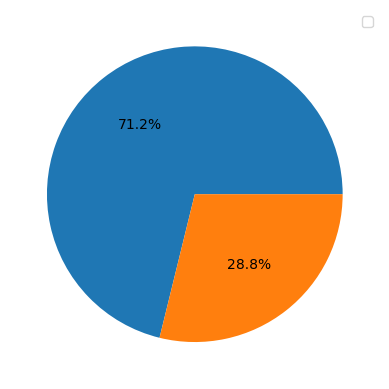

In [10]:
plt.pie(df['left'].value_counts(),autopct='%1.1f%%')
plt.legend()
plt.show()

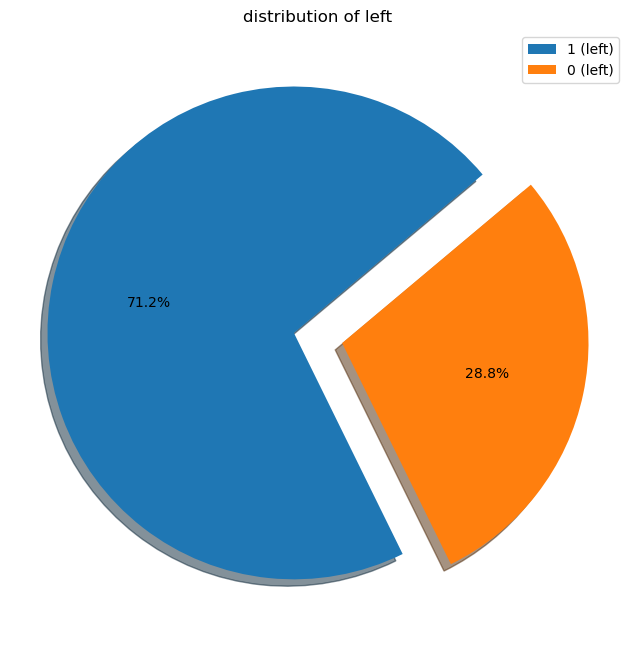

In [11]:

def plots(df,col):
    values = df[col].unique()
    plt.figure(figsize=(12,8))
    
    explode = [0.1 if len(values) >1 else 0] * len(values)
    plt.pie(df[col].value_counts(),explode=explode,startangle=40,autopct='%1.1f%%',shadow=True)
    labels = [f'{value} ({col})' for value in values]
    plt.legend(labels=labels,loc='upper right')
    
    plt.title(f"distribution of {col}")
    plt.show()
    
plots(df,'left')

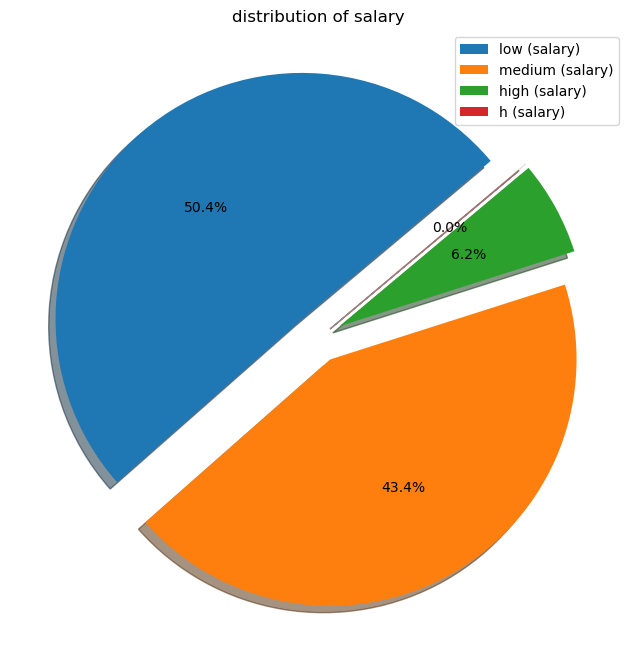

In [12]:
plots(df,'salary')

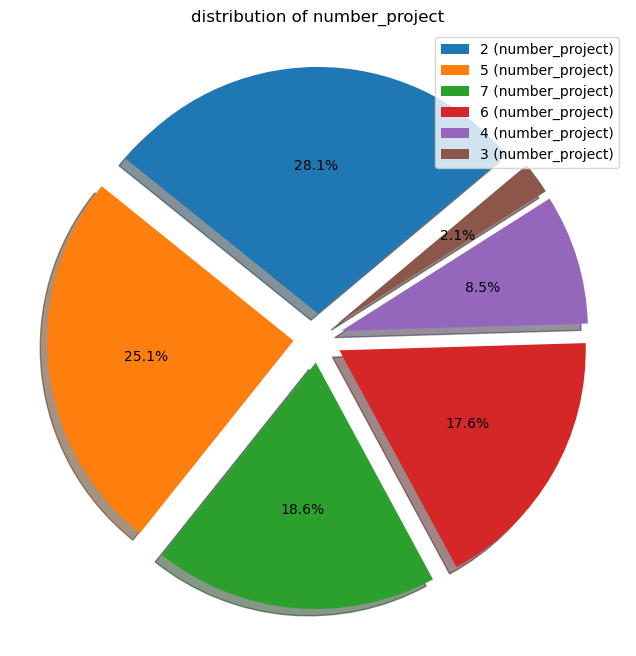

In [13]:

plots(df,'number_project')

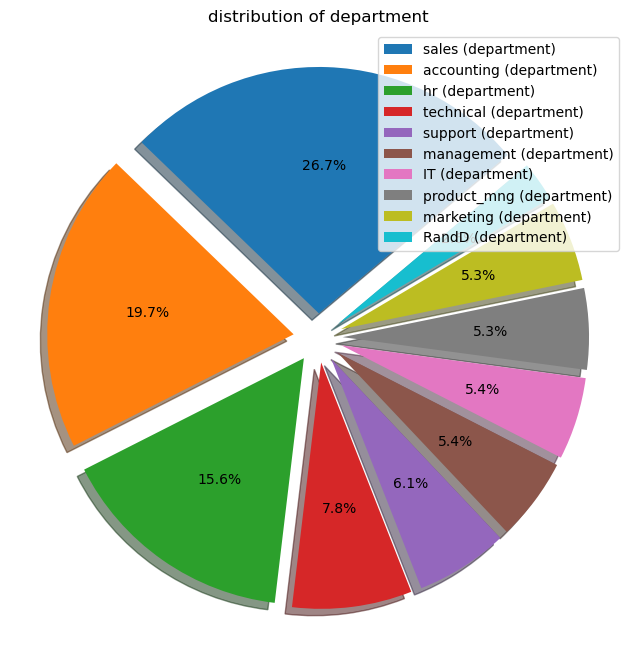

In [14]:

plots(df,'department')

# Employee Distribution

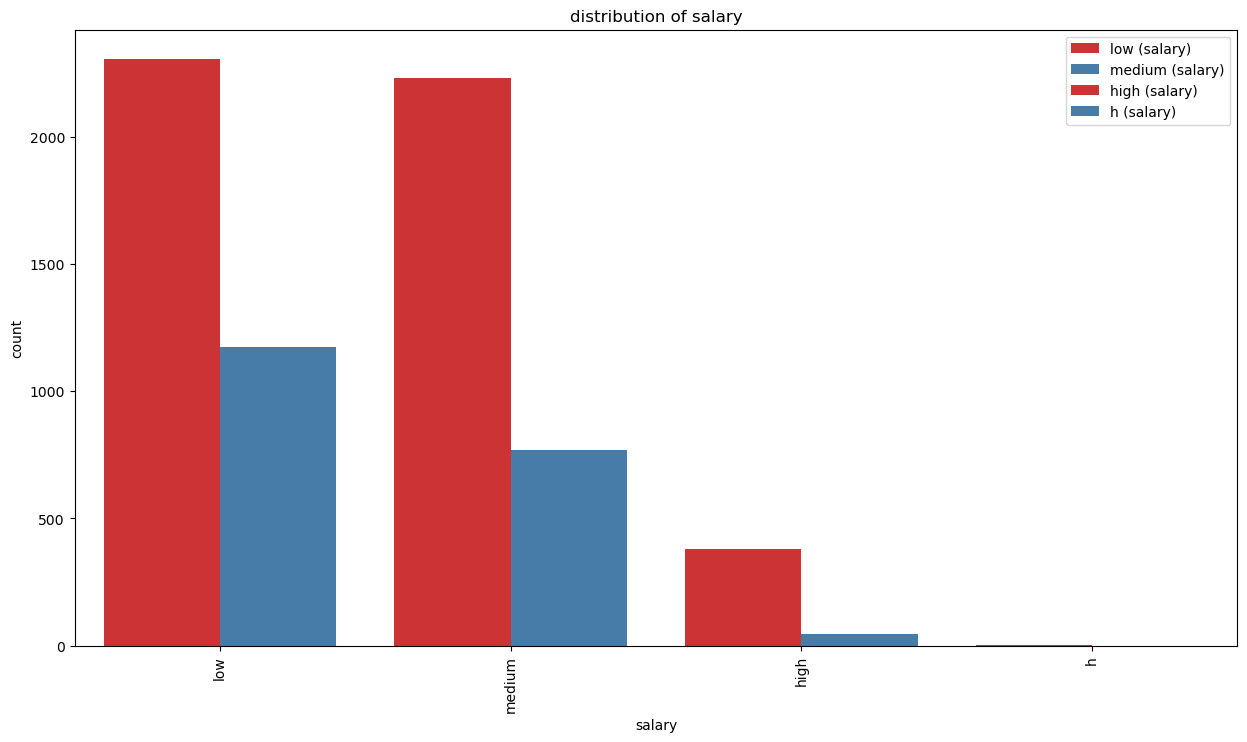

In [15]:
def distribution(df,col):
    values = df[col].unique()
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[col],hue='left',palette='Set1',data=df)
    labels = [f"{val} ({col})" for val in values]
    plt.legend(labels=labels,loc="upper right")
    plt.title(f"distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()
distribution(df,'salary')

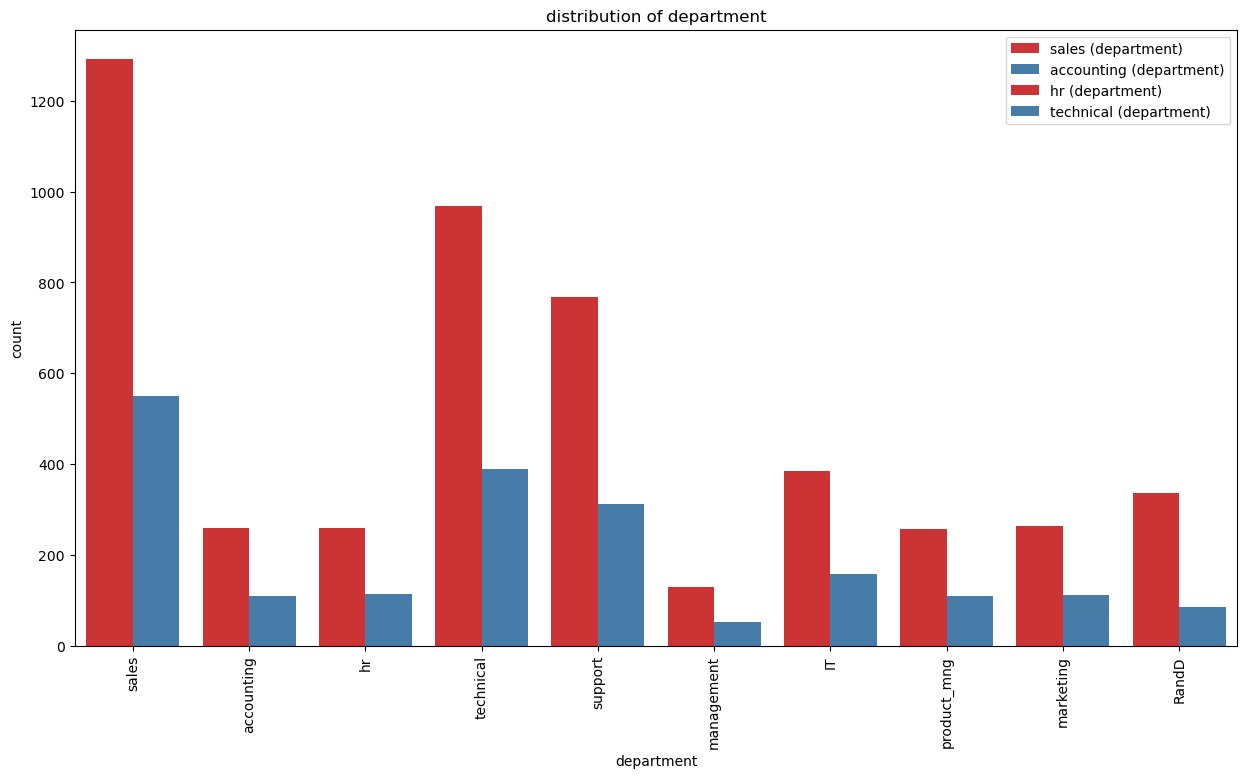

In [16]:
distribution(df,'department')

# Comparison

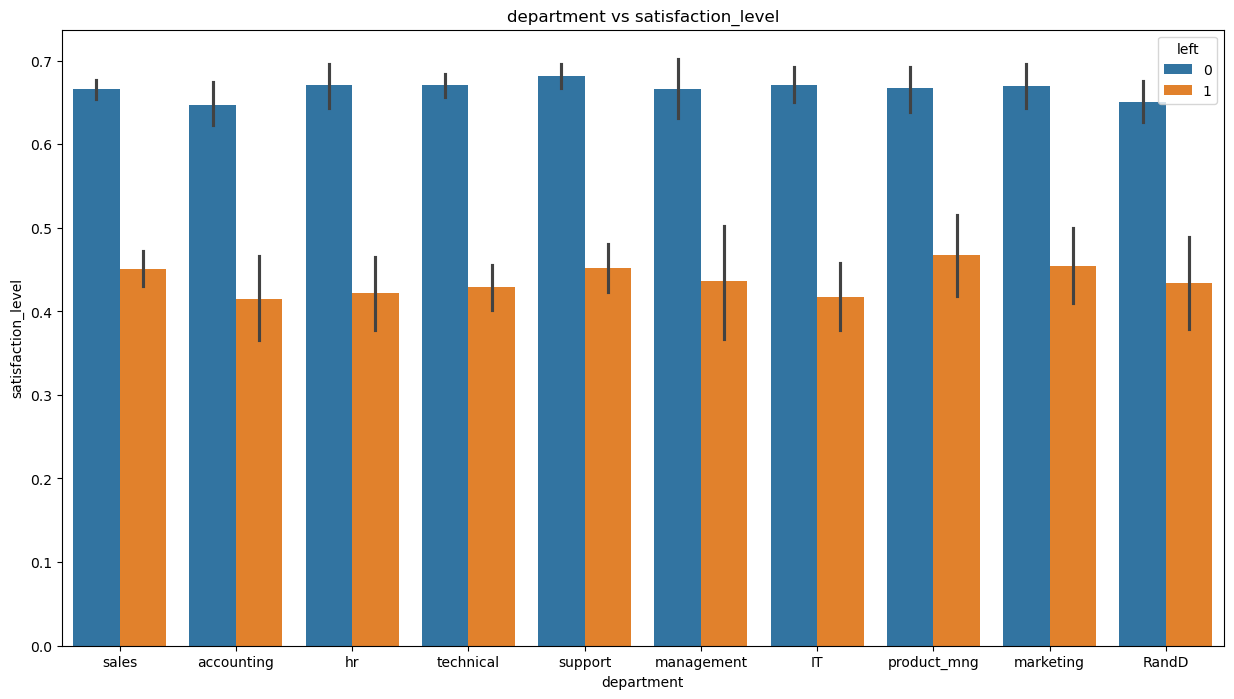

In [17]:
def comparison(df,x,y):
    plt.figure(figsize=(15,8))
    sns.barplot(x=x,y=y,hue='left',data=df)
    plt.title(f'{x} vs {y}')
    plt.show()
comparison(df,'department', 'satisfaction_level')

# Feature Left Correlation

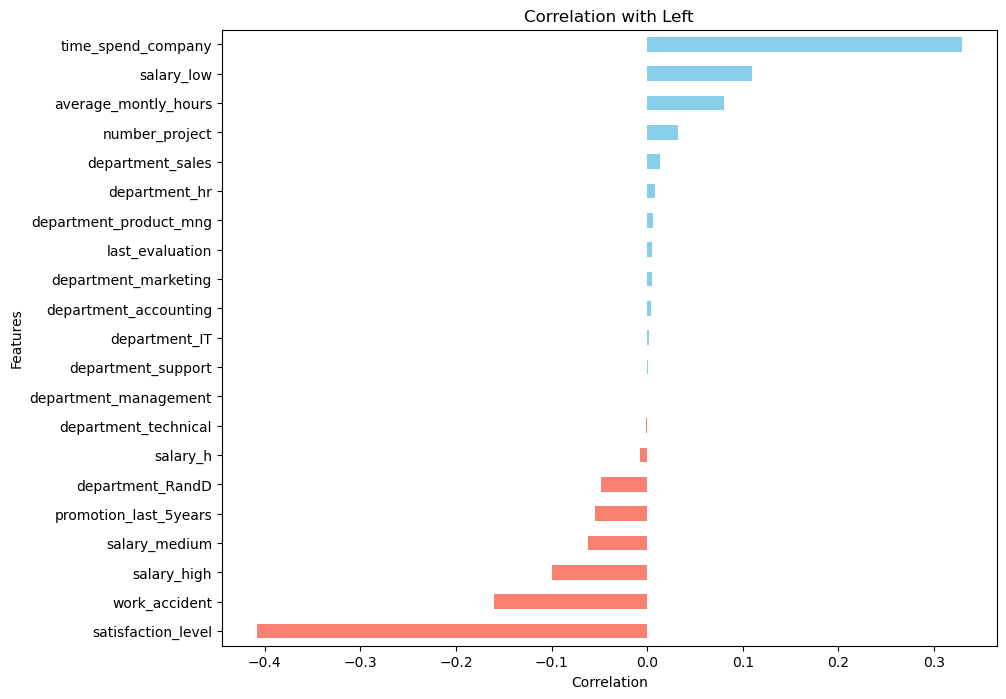

In [18]:
def corr_with_left(df):
    df_encoded = pd.get_dummies(df)
    correlations = df_encoded.corr()['left'].sort_values()[:-1]
    colors = ['skyblue' if corr>=0 else 'salmon' for corr in correlations]
    plt.figure(figsize=(10,8))
    correlations.plot(kind='barh', color=colors)
    # Add title and labels
    plt.title('Correlation with Left')
    plt.xlabel('Correlation')
    plt.ylabel('Features')

    # Show the plot
    plt.show()
corr_with_left(df)

# Employe Churn Analysis
This code generates a subplot with two histograms for visualization purposes. The first histogram displays the distribution of the column specified by the variable col in the DataFrame df, with bins set to 20. The bars are colored according to the 'left' column. The second histogram is a kernel density estimation plot showing the relationship between 'satisfaction_level' and 'last_evaluation', also colored by the 'left' column. Finally, plt.tight_layout() ensures that the plots are properly arranged and displayed without overlapping.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19748\160058733.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])


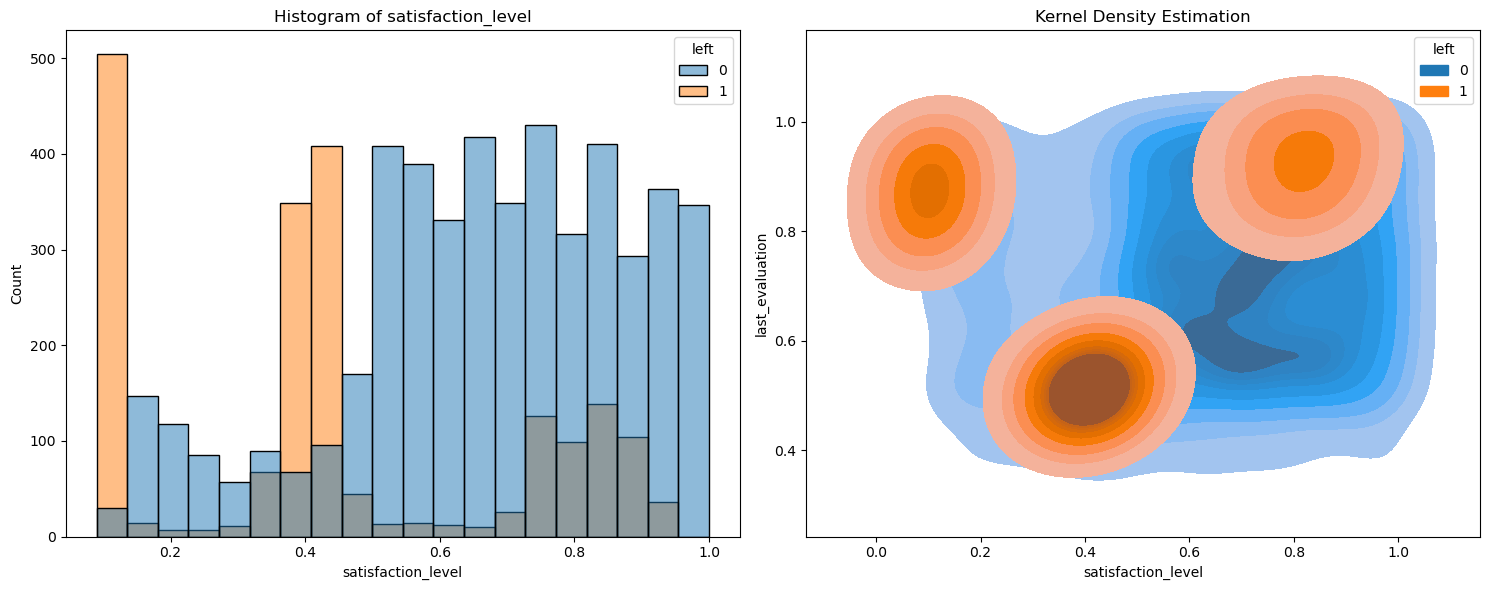

In [19]:
def histogram(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a grid of 1 row and 2 columns

    # Plot the first histogram
    sns.histplot(data=df, x=col, hue='left', bins=20, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    # Plot the second histogram
    sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', shade=True, ax=axes[1])
    axes[1].set_title("Kernel Density Estimation")

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()

histogram(df, 'satisfaction_level')